In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge



## Data Collection 

In [2]:
df=pd.read_csv('/kaggle/input/houses-in-london/london_houses.csv')

## Data Representation

In [3]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [5]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


## Data Wrangling

In [6]:
df=df.drop(columns=['Address'])

In [7]:
df

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


In [8]:
df.head(5)

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


## Data Analyses

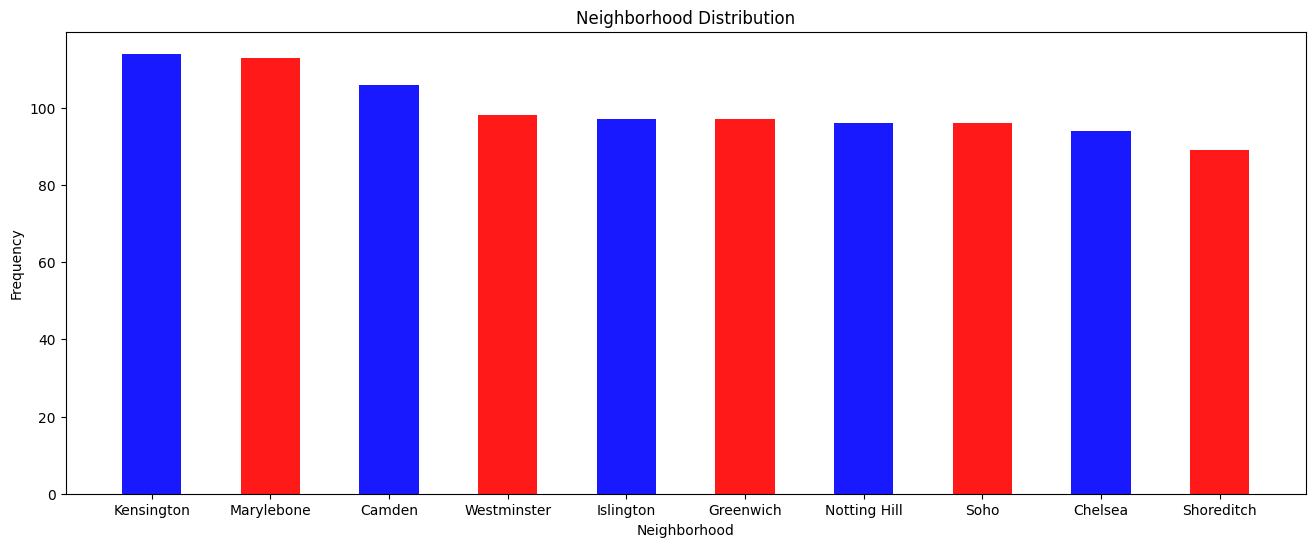

In [9]:
plt.figure(figsize=(16, 6))
plt.bar(df['Neighborhood'].value_counts().index, df['Neighborhood'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.title('Neighborhood Distribution')
plt.show()

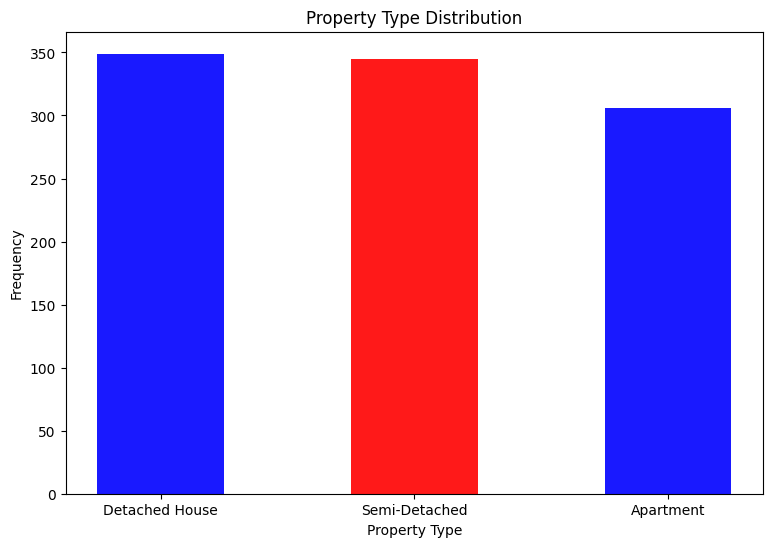

In [10]:
plt.figure(figsize=(9, 6))
plt.bar(df['Property Type'].value_counts().index, df['Property Type'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Property Type Distribution')
plt.show()

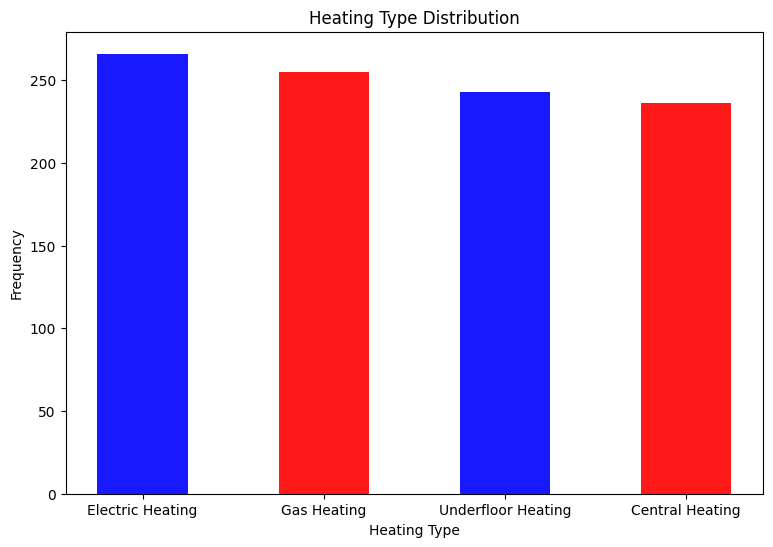

In [11]:
plt.figure(figsize=(9, 6))
plt.bar(df['Heating Type'].value_counts().index, df['Heating Type'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Heating Type')
plt.ylabel('Frequency')
plt.title('Heating Type Distribution')
plt.show()

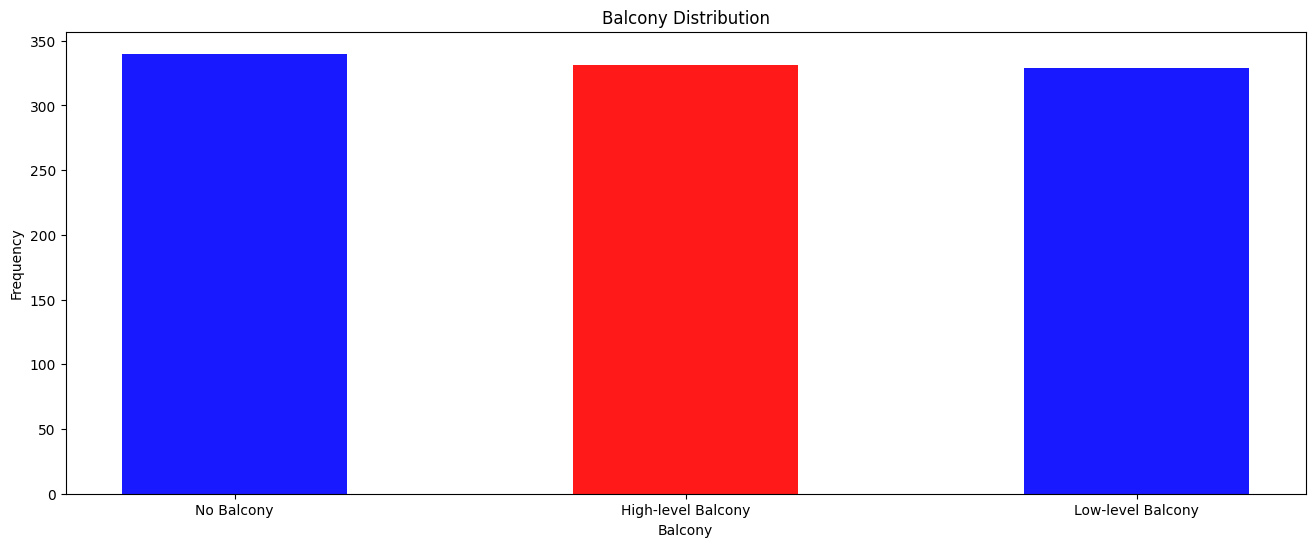

In [12]:
plt.figure(figsize=(16, 6))
plt.bar(df['Balcony'].value_counts().index, df['Balcony'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Balcony')
plt.ylabel('Frequency')
plt.title('Balcony Distribution')
plt.show()

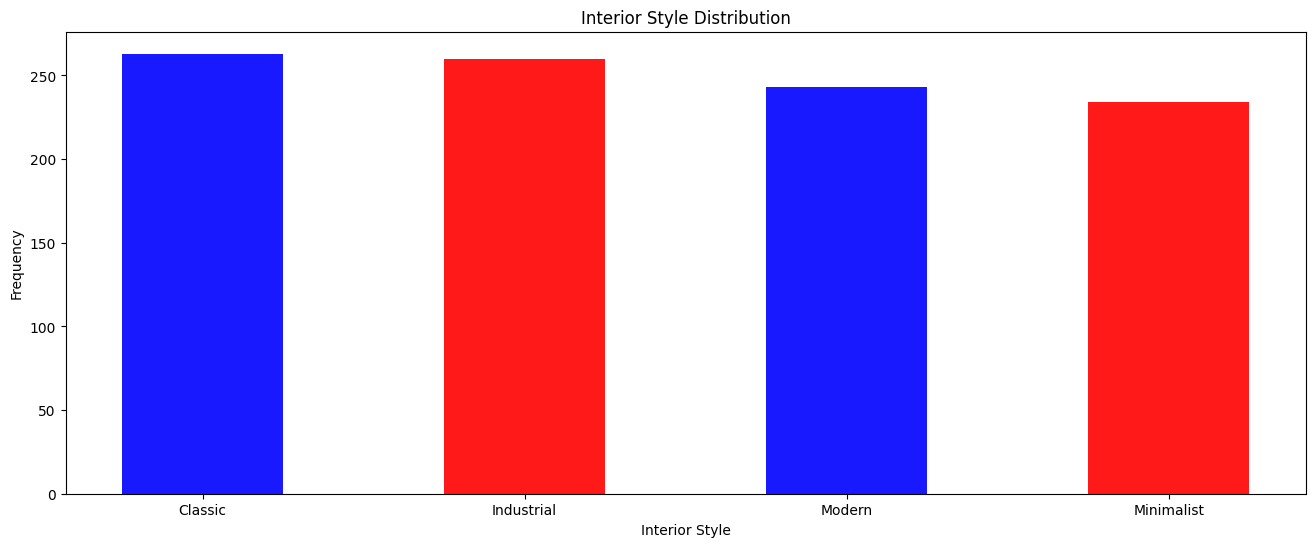

In [13]:
plt.figure(figsize=(16, 6))
plt.bar(df['Interior Style'].value_counts().index, df['Interior Style'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Interior Style')
plt.ylabel('Frequency')
plt.title('Interior Style Distribution')
plt.show()

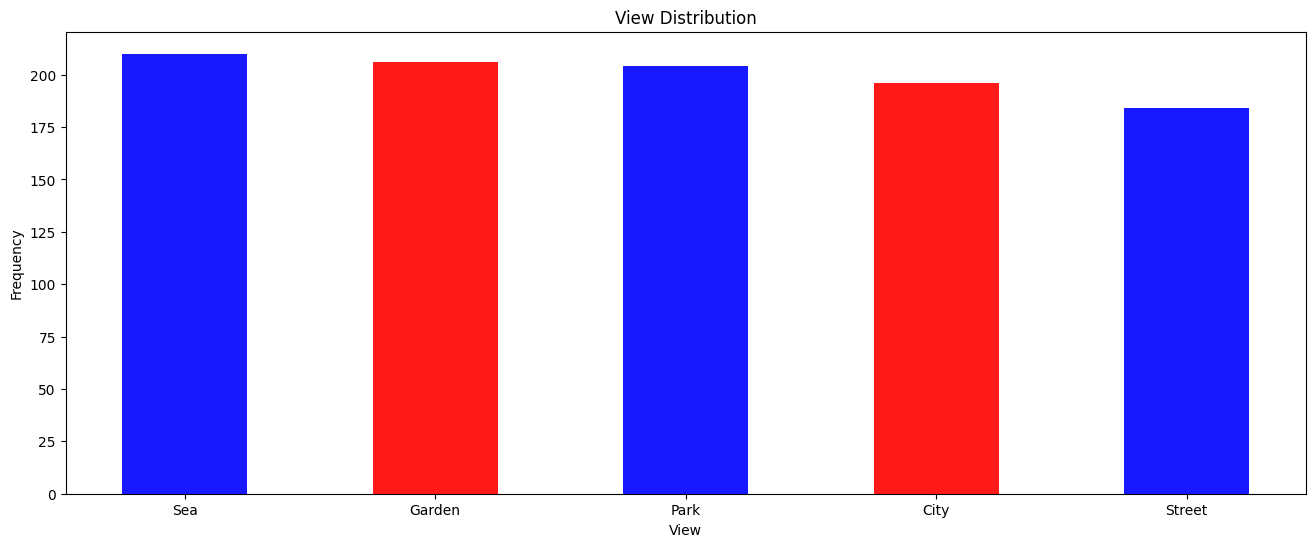

In [14]:
plt.figure(figsize=(16, 6))
plt.bar(df['View'].value_counts().index, df['View'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('View')
plt.ylabel('Frequency')
plt.title('View Distribution')
plt.show()

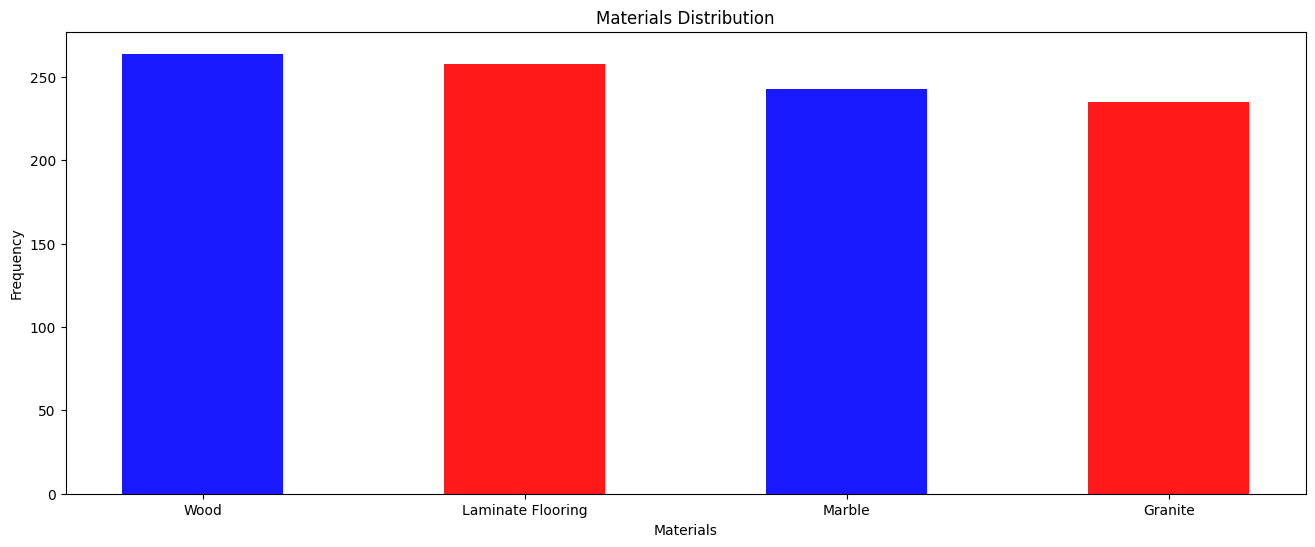

In [15]:
plt.figure(figsize=(16, 6))
plt.bar(df['Materials'].value_counts().index, df['Materials'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Materials')
plt.ylabel('Frequency')
plt.title('Materials Distribution')
plt.show()

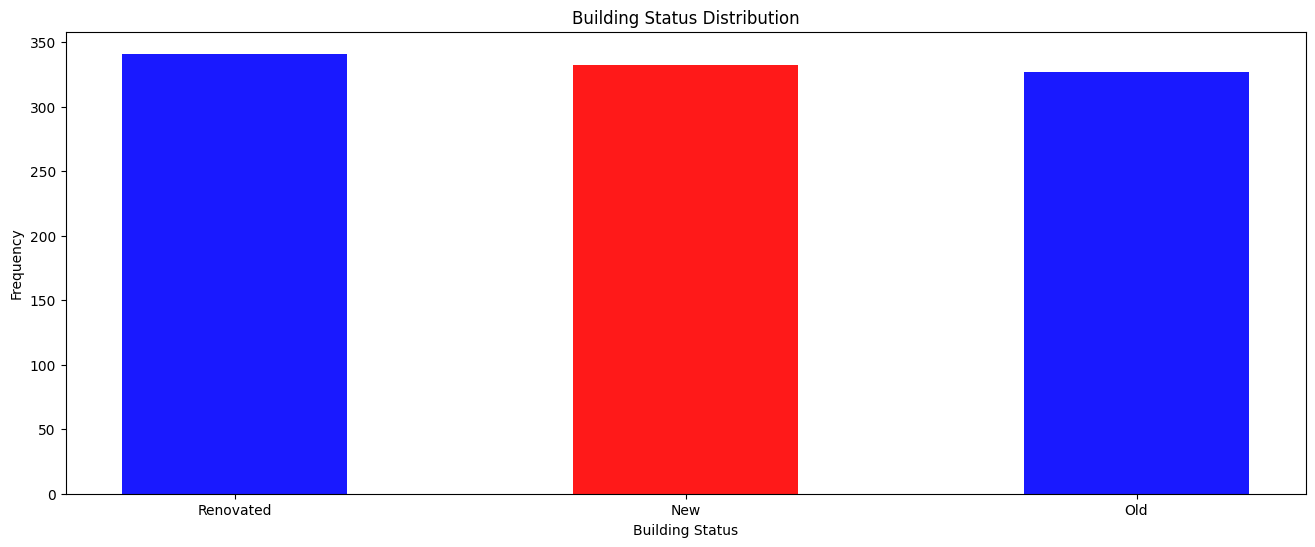

In [16]:
plt.figure(figsize=(16, 6))
plt.bar(df['Building Status'].value_counts().index, df['Building Status'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Building Status')
plt.ylabel('Frequency')
plt.title('Building Status Distribution')
plt.show()

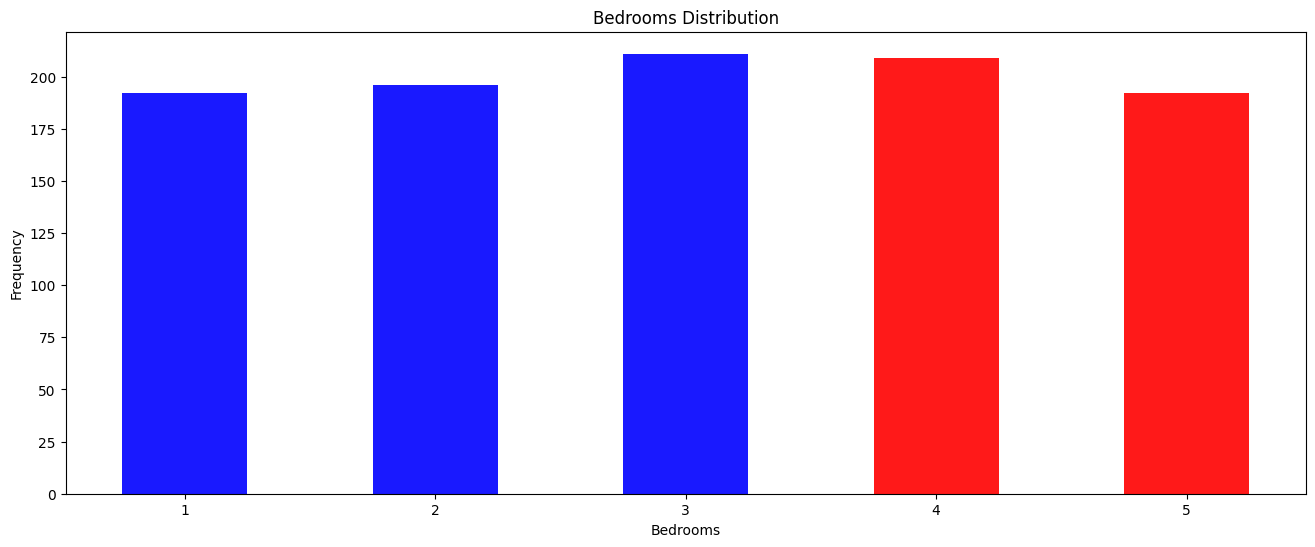

In [17]:
plt.figure(figsize=(16, 6))
plt.bar(df['Bedrooms'].value_counts().index, df['Bedrooms'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Bedrooms Distribution')
plt.show()

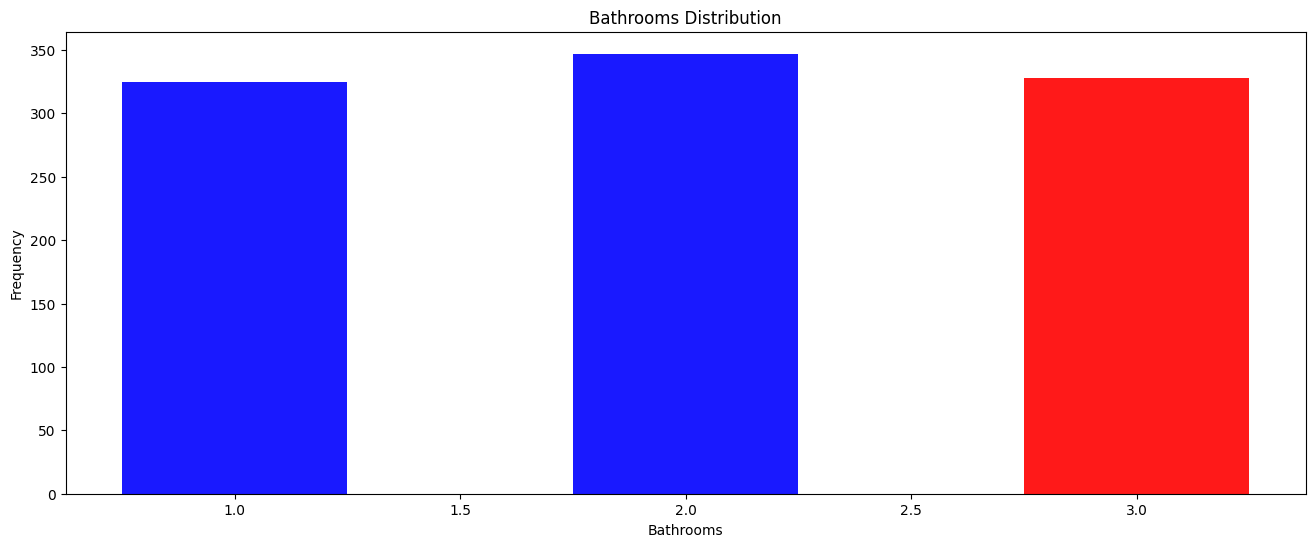

In [18]:
plt.figure(figsize=(16, 6))
plt.bar(df['Bathrooms'].value_counts().index, df['Bathrooms'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Bathrooms Distribution')
plt.show()

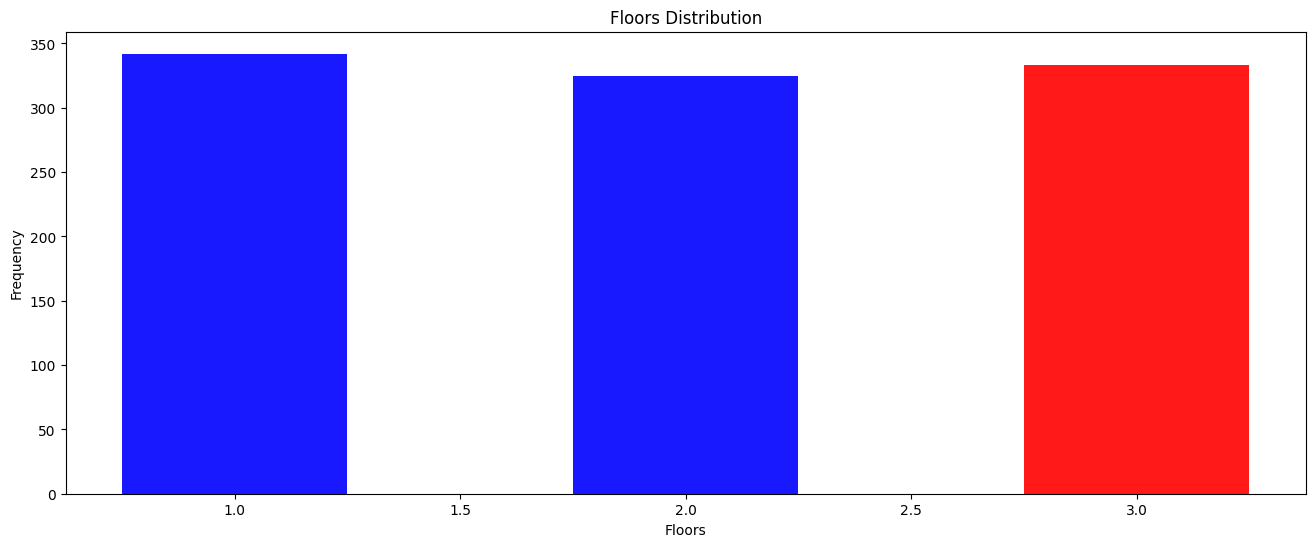

In [19]:
plt.figure(figsize=(16, 6))
plt.bar(df['Floors'].value_counts().index, df['Floors'].value_counts().values, 
        color=['blue', 'red'], width=0.5, alpha=0.9)
plt.xlabel('Floors')
plt.ylabel('Frequency')
plt.title('Floors Distribution')
plt.show()

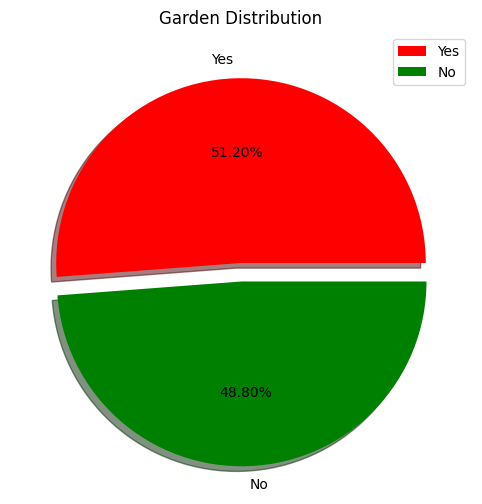

In [20]:
plt.figure(figsize=(10, 6))
plt.pie(df['Garden'].value_counts().values,
        labels=df['Garden'].value_counts().index,
        colors=['red', 'green'],
        explode=[0.0, 0.1],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('Garden Distribution')
plt.legend()
plt.show()

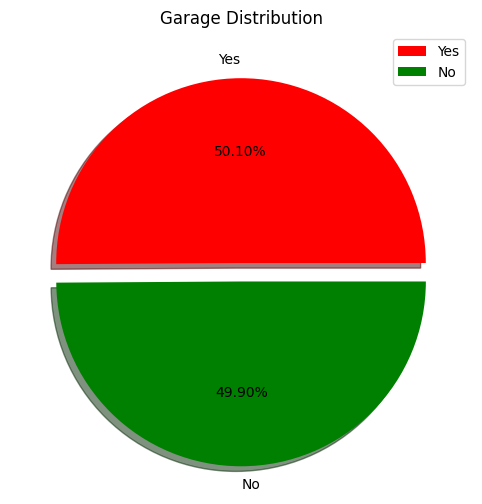

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(df['Garage'].value_counts().values,
        labels=df['Garage'].value_counts().index,
        colors=['red', 'green'],
        explode=[0.0, 0.1],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('Garage Distribution')
plt.legend()
plt.show()

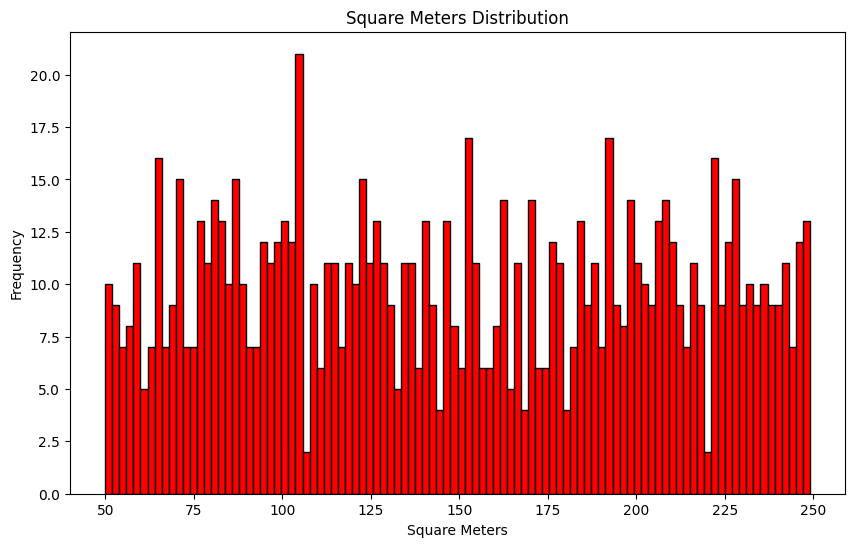

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Square Meters'], bins=100, color='red', alpha=1, edgecolor='black')
plt.title('Square Meters Distribution')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

plt.show()

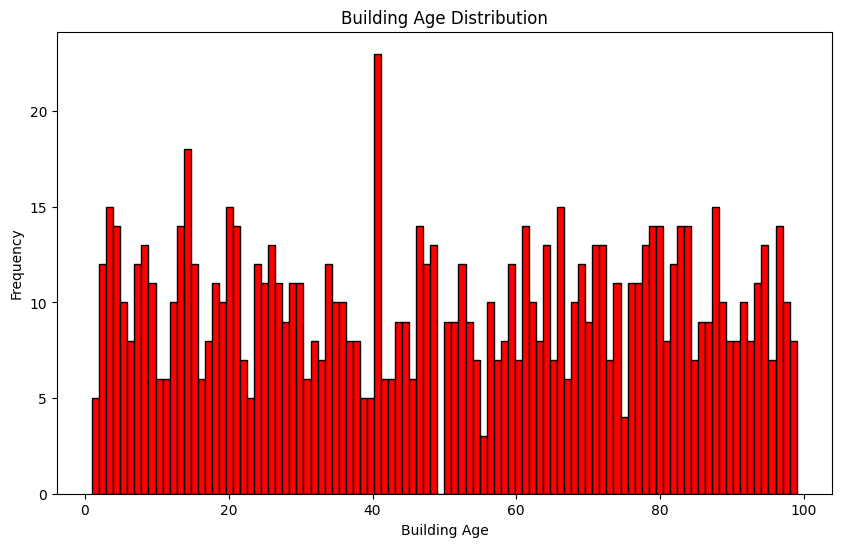

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['Building Age'], bins=100, color='red', alpha=1, edgecolor='black')
plt.title('Building Age Distribution')
plt.xlabel('Building Age')
plt.ylabel('Frequency')

plt.show()

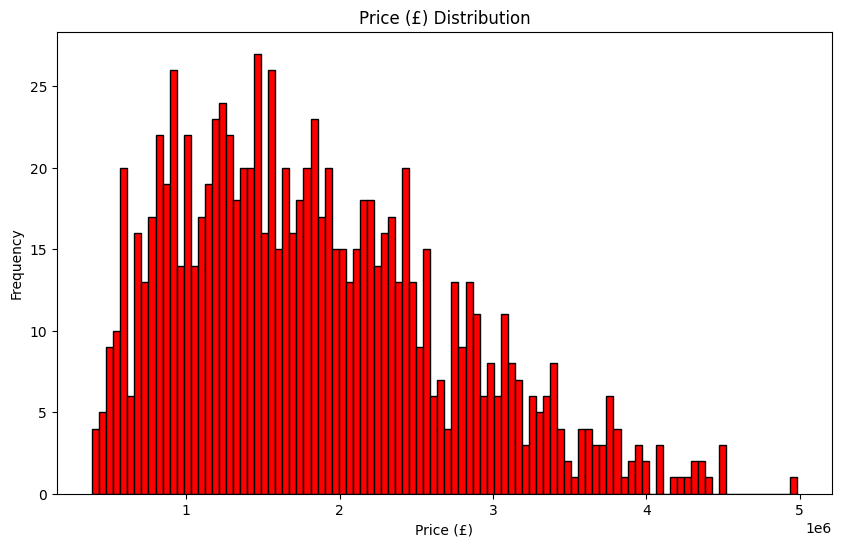

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price (£)'], bins=100, color='red', alpha=1, edgecolor='black')
plt.title('Price (£) Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

plt.show()

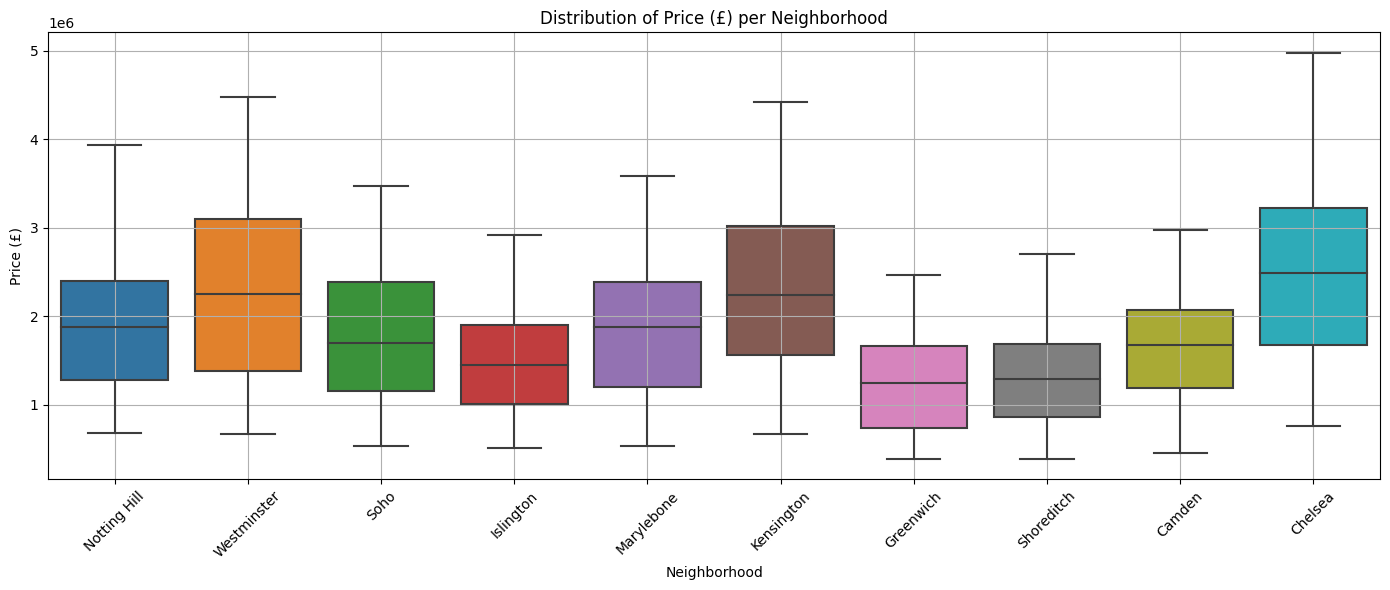

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Neighborhood', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

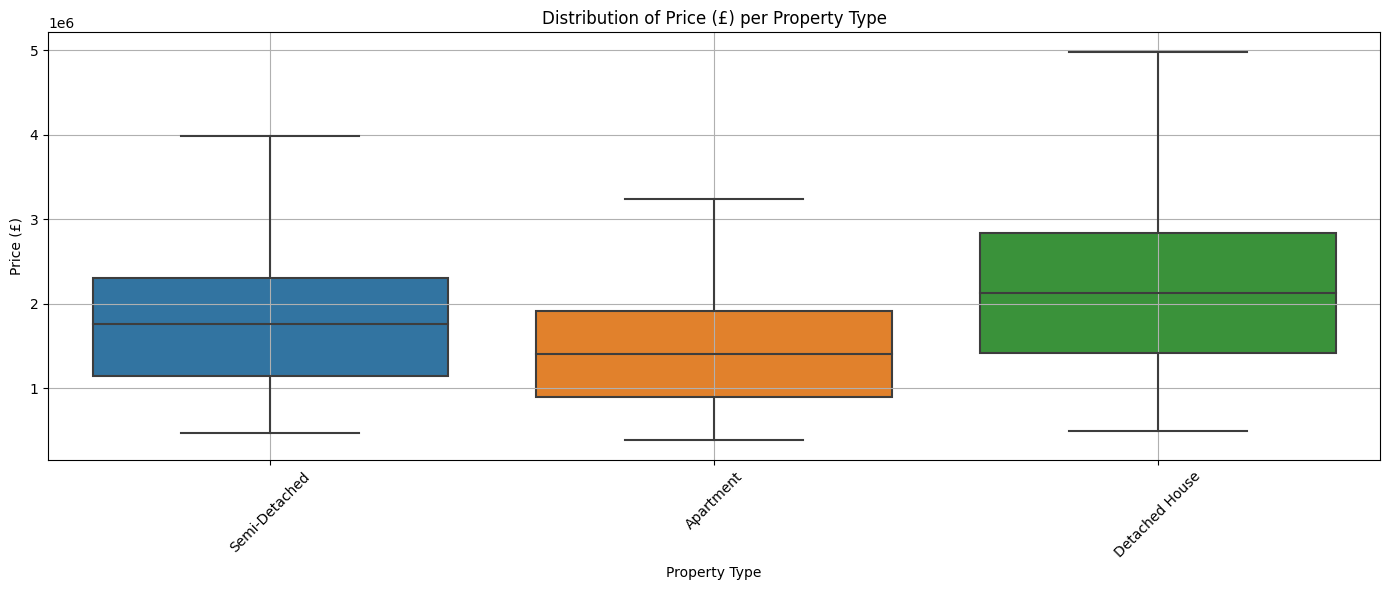

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Property Type', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

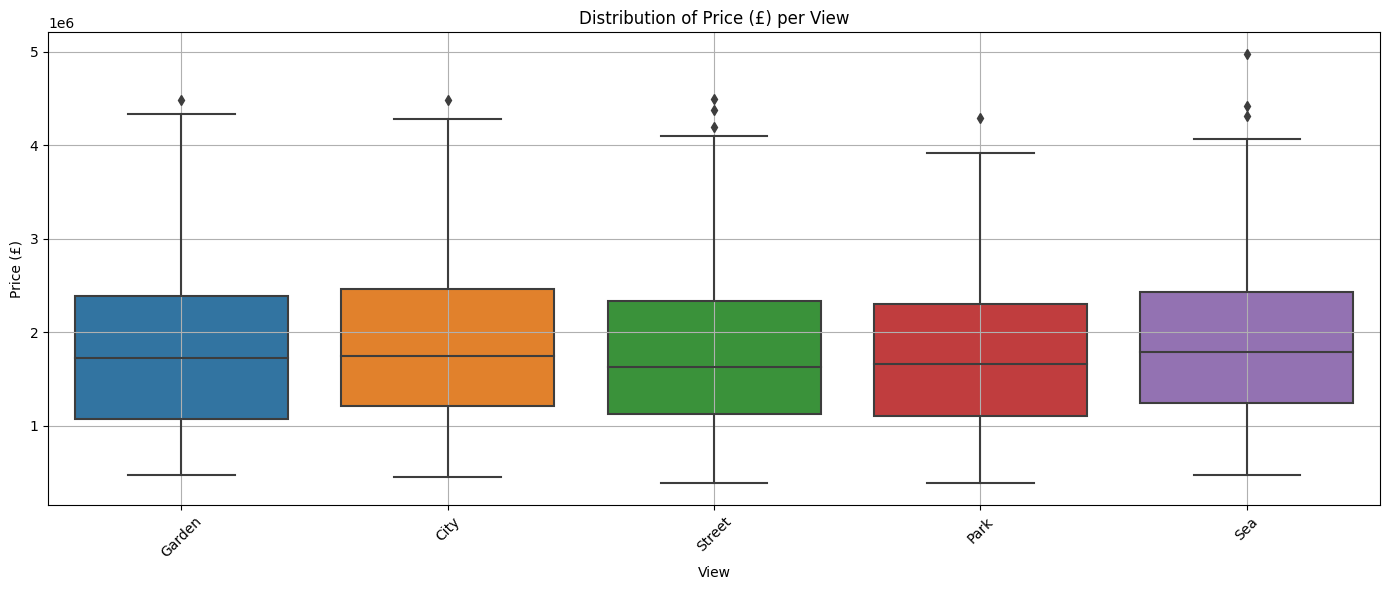

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='View', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per View')
plt.xlabel('View')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

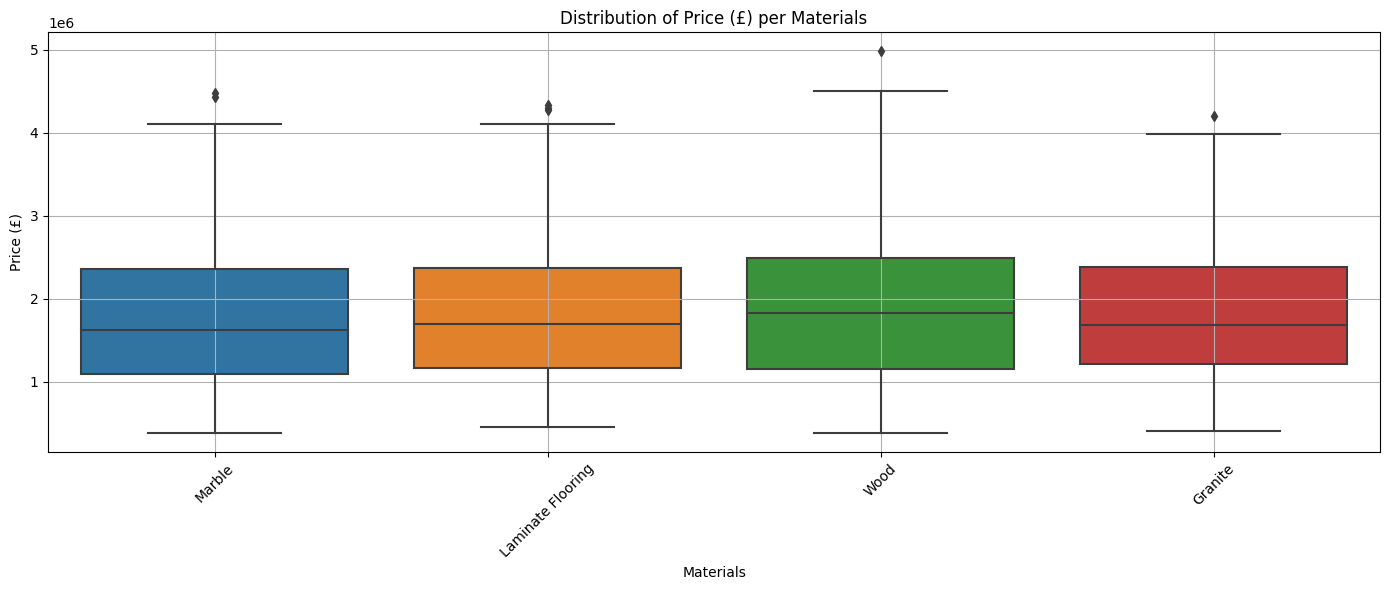

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Materials', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Materials')
plt.xlabel('Materials')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

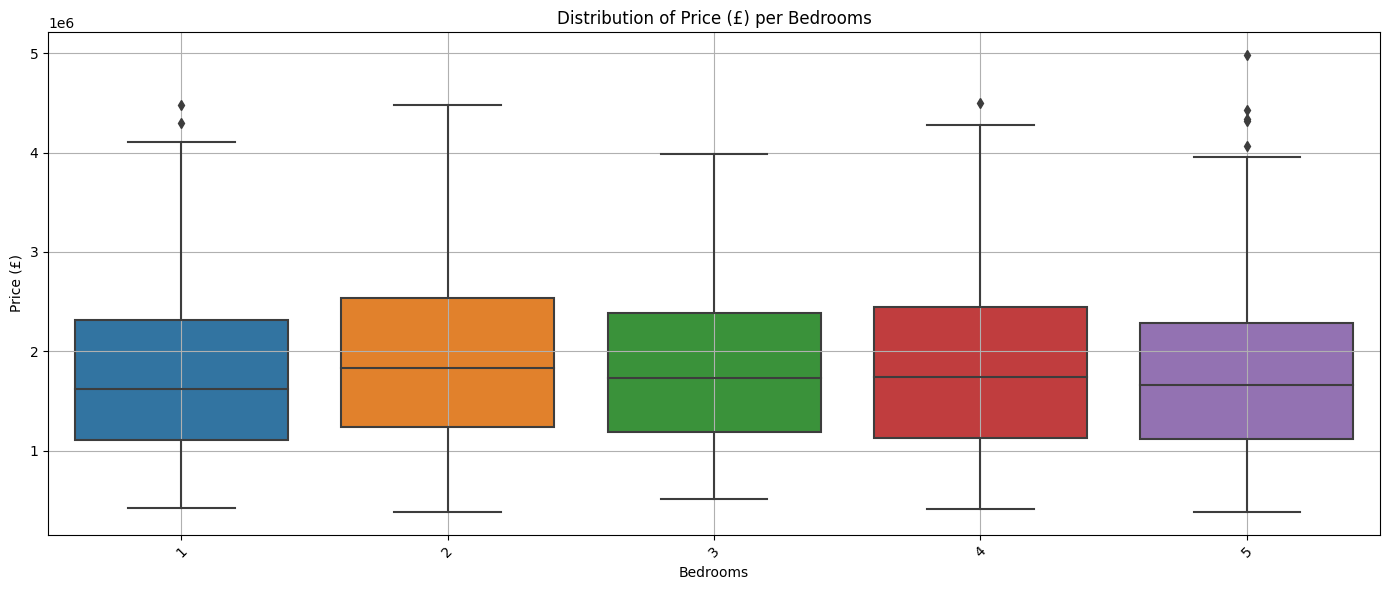

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Bedrooms', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

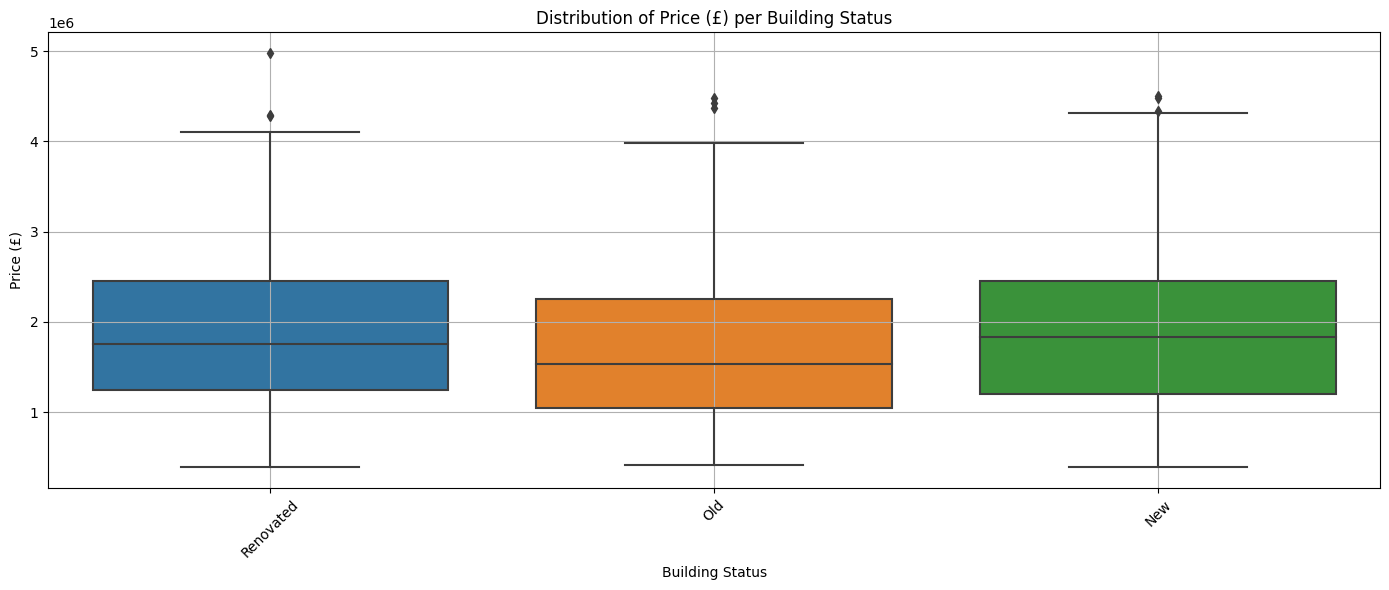

In [30]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Building Status', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Building Status')
plt.xlabel('Building Status')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

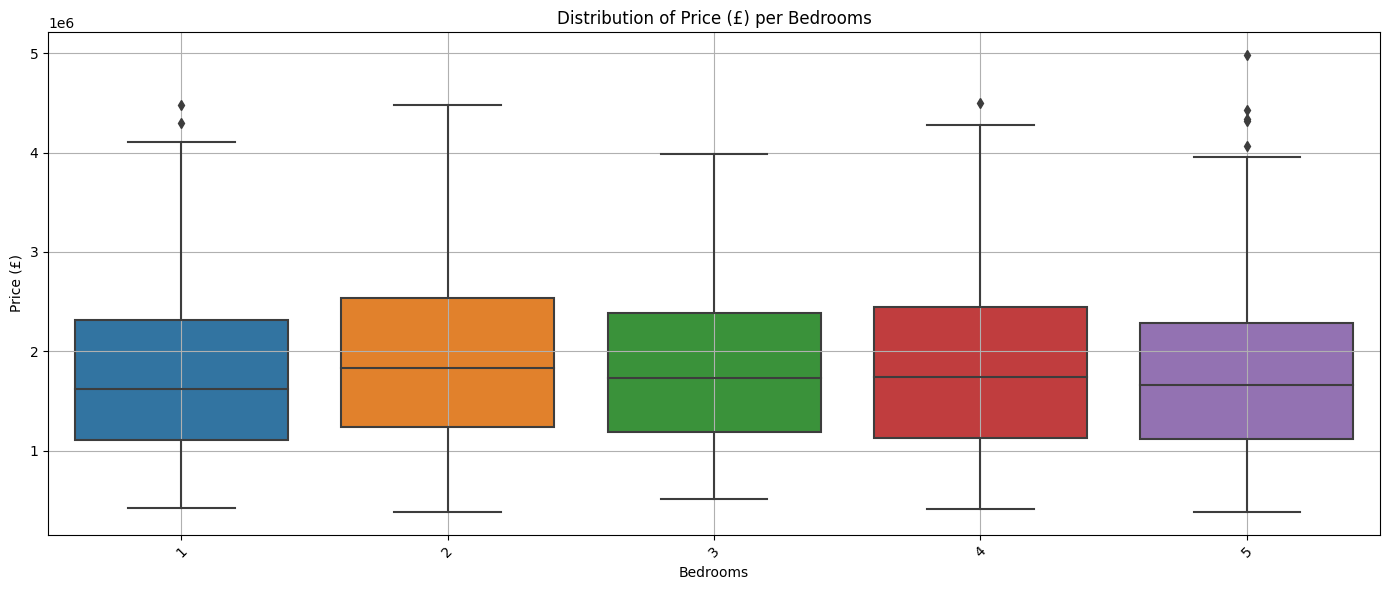

In [31]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Bedrooms', y='Price (£)')
plt.xticks(rotation=45)
plt.title('Distribution of Price (£) per Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

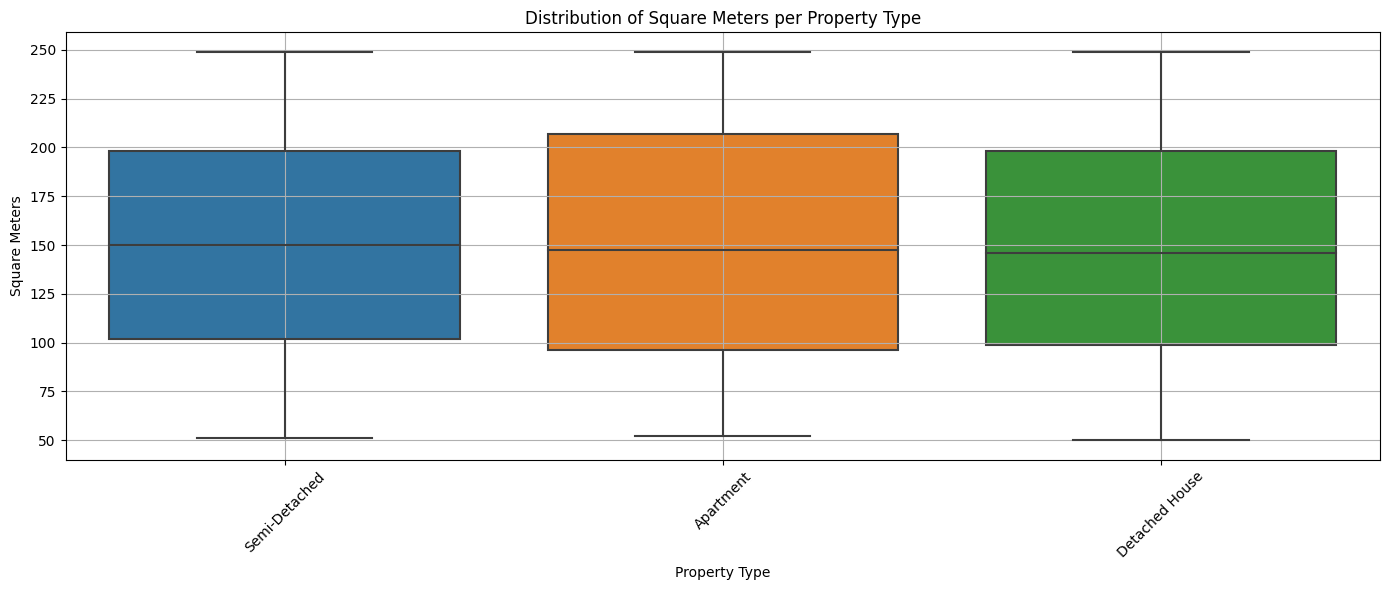

In [32]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Property Type', y='Square Meters')
plt.xticks(rotation=45)
plt.title('Distribution of Square Meters per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Square Meters')
plt.grid(True)
plt.tight_layout()
plt.show()

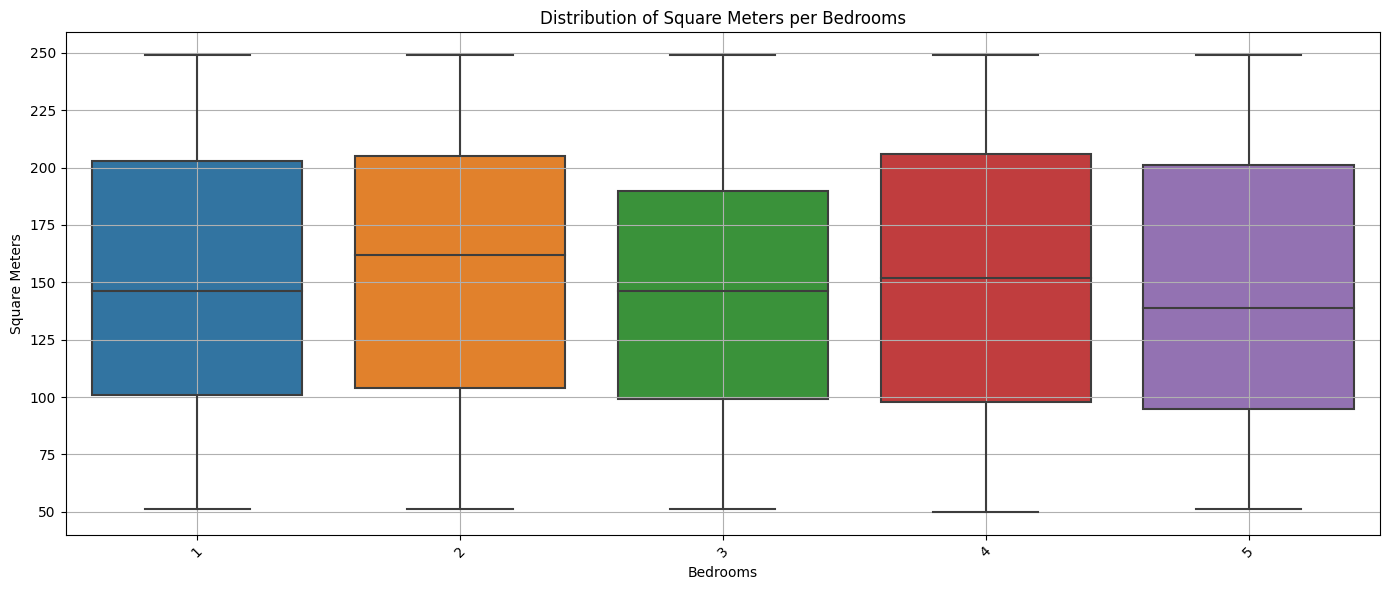

In [33]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Bedrooms', y='Square Meters')
plt.xticks(rotation=45)
plt.title('Distribution of Square Meters per Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Square Meters')
plt.grid(True)
plt.tight_layout()
plt.show()

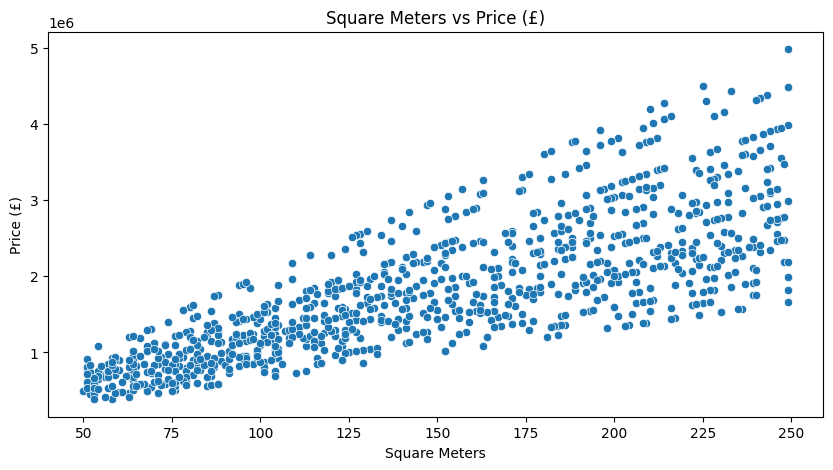

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Square Meters', y='Price (£)')
plt.title('Square Meters vs Price (£)')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


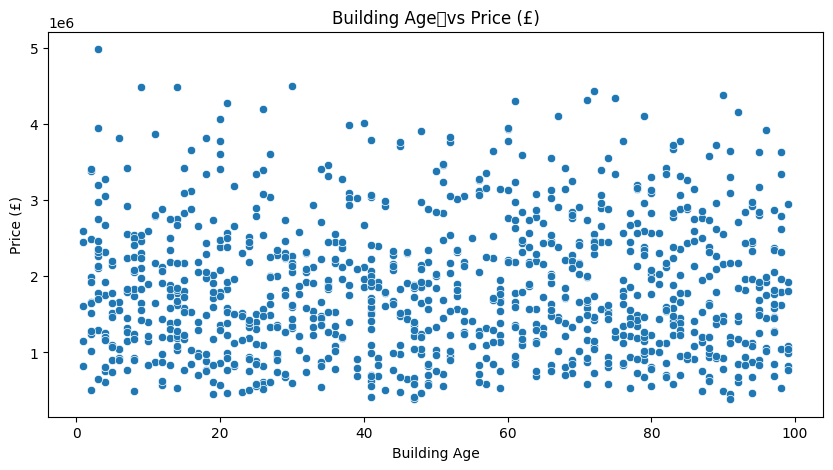

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Building Age', y='Price (£)')
plt.title('Building Age	vs Price (£)')
plt.show()

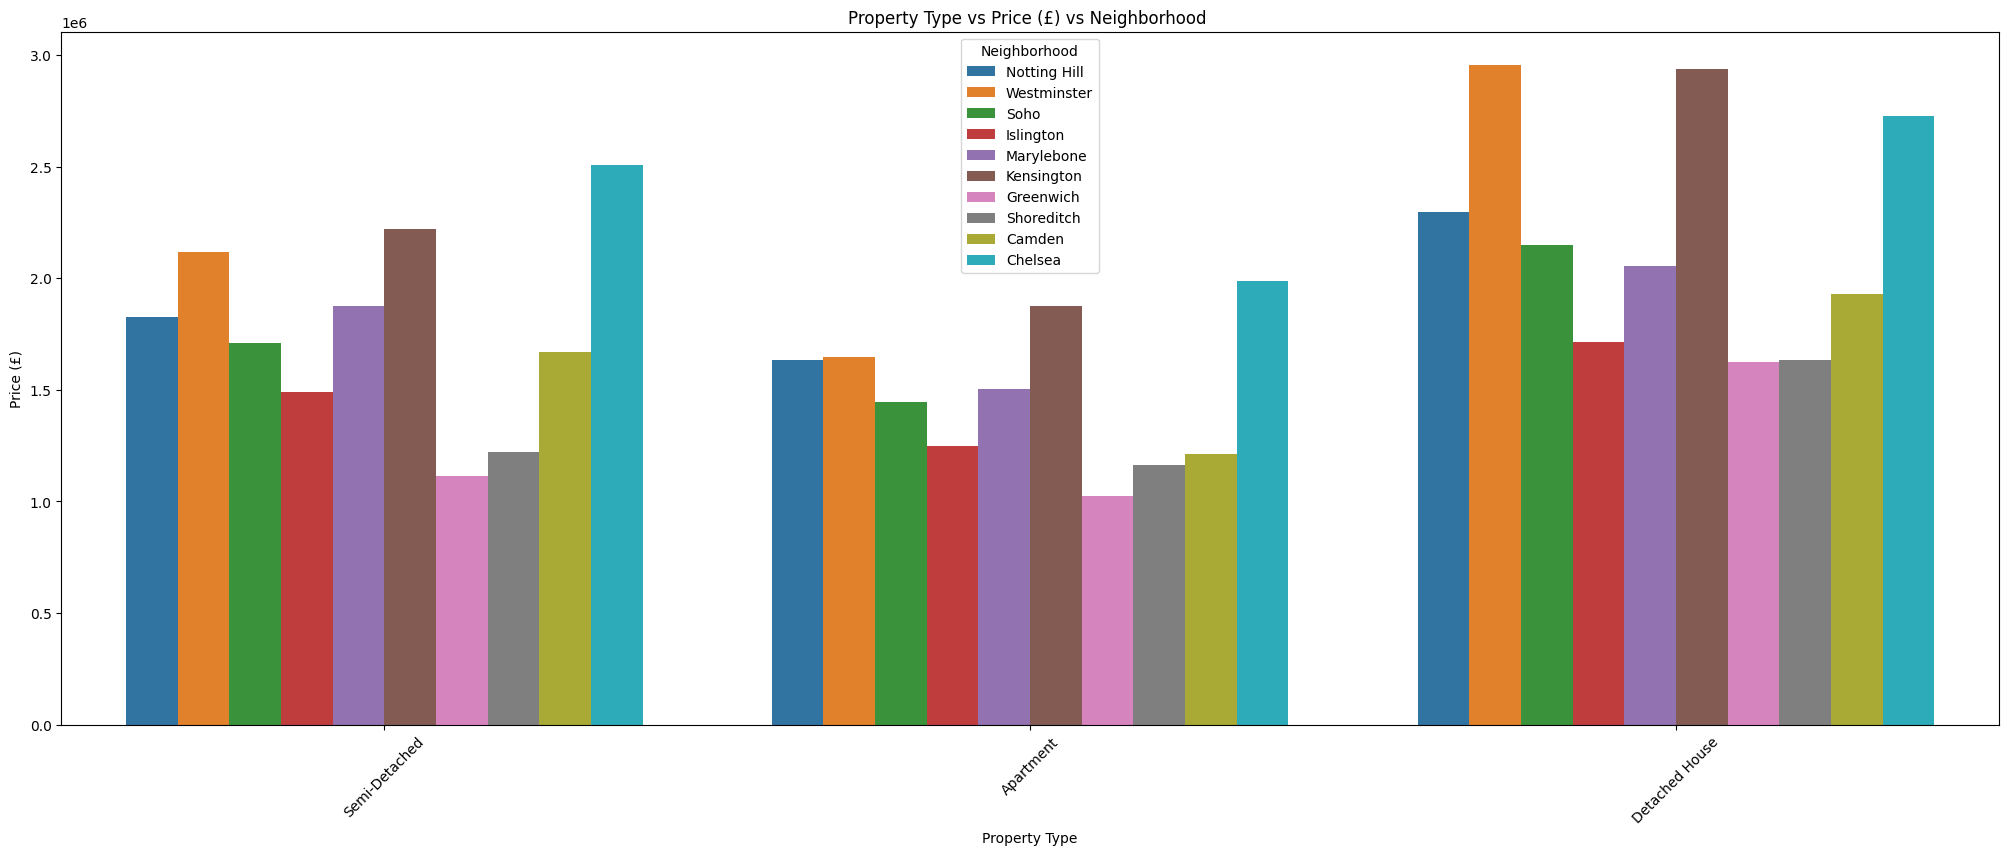

In [36]:


plt.figure(figsize=(25, 9))
sns.barplot(data=df, x='Property Type', y='Price (£)', hue='Neighborhood', errorbar=None)
plt.title('Property Type vs Price (£) vs Neighborhood ')
plt.xticks(rotation=45)
plt.show()




## Data Preprocessing

In [37]:
x = df.drop(columns=['Price (£)'])
y = df['Price (£)']

In [38]:
x

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated
996,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old
997,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old
998,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated


In [39]:
y

0      2291200
1      1476000
2      1881600
3      1896000
4      1524000
        ...   
995    1166400
996     563333
997    1986399
998    1703000
999    2343333
Name: Price (£), Length: 1000, dtype: int64

In [40]:
df

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


In [41]:
encoder = LabelEncoder()
x['Neighborhood'] = encoder.fit_transform(df['Neighborhood'])
x['Garden'] = encoder.fit_transform(df['Garden'])
x['Garage'] = encoder.fit_transform(df['Garage'])
x['Property Type'] = encoder.fit_transform(df['Property Type'])
x['Heating Type'] = encoder.fit_transform(df['Heating Type'])
x['Balcony'] = encoder.fit_transform(df['Balcony'])
x['Interior Style'] = encoder.fit_transform(df['Interior Style'])
x['View'] = encoder.fit_transform(df['View'])
x['Materials'] = encoder.fit_transform(df['Materials'])
x['Building Status'] = encoder.fit_transform(df['Building Status'])

In [42]:
x

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status
0,6,2,3,179,72,0,0,3,2,1,0,1,1,2,2
1,9,2,1,123,34,1,0,1,0,0,0,1,0,1,1
2,8,5,3,168,38,0,1,3,2,0,2,1,4,3,2
3,3,5,1,237,53,1,1,1,0,3,2,0,2,0,2
4,5,4,1,127,23,0,1,2,2,0,2,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,1,3,81,4,1,1,2,2,0,1,3,4,1,2
996,0,1,1,65,51,0,0,1,0,3,2,1,1,3,1
997,0,4,1,191,27,0,1,2,2,0,1,2,2,1,1
998,0,5,2,131,3,1,0,2,1,3,0,3,2,1,2


In [43]:
scaler = MinMaxScaler()

x['Square Meters'] = scaler.fit_transform(x[['Square Meters']])

In [44]:
scaler = MinMaxScaler()

x['Building Age'] = scaler.fit_transform(x[['Building Age']])

In [45]:
x

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status
0,6,2,3,0.648241,0.724490,0,0,3,2,1,0,1,1,2,2
1,9,2,1,0.366834,0.336735,1,0,1,0,0,0,1,0,1,1
2,8,5,3,0.592965,0.377551,0,1,3,2,0,2,1,4,3,2
3,3,5,1,0.939698,0.530612,1,1,1,0,3,2,0,2,0,2
4,5,4,1,0.386935,0.224490,0,1,2,2,0,2,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,1,3,0.155779,0.030612,1,1,2,2,0,1,3,4,1,2
996,0,1,1,0.075377,0.510204,0,0,1,0,3,2,1,1,3,1
997,0,4,1,0.708543,0.265306,0,1,2,2,0,1,2,2,1,1
998,0,5,2,0.407035,0.020408,1,0,2,1,3,0,3,2,1,2


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Data Module

In [47]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(x_test)

In [49]:
y_pred

array([2584437.02000525,  698647.07415108, 1392591.0103926 ,
        470685.73239696, 1878864.71006574,  897362.03623731,
       1789188.75546155,  966013.40143933, 1357484.66596542,
        704714.37722842, 2774046.08755073, 1205352.50596838,
       1596173.76761773, 2190038.72060472, 1257624.72837071,
       2100231.58005202, 1697432.40898638, 2535586.95097711,
       1383091.71661492, 2039091.42017529, 1665748.13949212,
       2205759.83233527, 1473004.83376039, 2034577.07783338,
       1101034.66343142, 2097039.12100318, 2432785.24159942,
       1250765.94957762, 1372237.36939761, 3033031.41440285,
       2639929.19797801, 1501710.26063006, 1759336.49674679,
       1587922.80400835, 2145673.51269017, 3101362.15585901,
       1220649.73428124, 2072814.61617227, 2350097.24942489,
       1198778.62731872, 2476994.63964196, 1039412.96315014,
       1320569.03419286,  882867.09663175, 1667602.82148489,
       1968440.65641414, 2110894.95788506,  584201.29819912,
       1664424.45522784,

In [50]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 408583.6794097065
RMSE: 529509.9491182314


In [51]:
sgd = SGDRegressor()

sgd.fit(x_train, y_train)

SGDRegressor()

In [52]:
y_pred = sgd.predict(x_test)

In [53]:
y_pred

array([2532175.43480796,  729431.16212445, 1447554.39967351,
        552322.41827987, 1896262.97408882,  932791.81314987,
       1786775.82826364, 1079639.746444  , 1388039.50341801,
        835857.77320399, 2727216.09827207, 1270800.12983779,
       1673660.54814994, 2200945.78191403, 1340003.29978924,
       2087537.93811832, 1710892.17210477, 2535531.6083205 ,
       1444873.27405715, 2016359.51670256, 1684038.93855505,
       2191183.5876879 , 1507528.56030852, 2025383.14854994,
       1225445.3812753 , 2109147.67164602, 2427447.66681181,
       1360576.60148358, 1419892.55258077, 3018654.23411446,
       2654559.60699453, 1602248.21258582, 1813061.48040191,
       1694461.05208298, 2101329.04543422, 3060846.99726731,
       1348266.37444873, 2034947.26180839, 2346193.11659871,
       1259478.38355847, 2436610.85215149, 1110431.88164097,
       1382984.47479627,  964658.91209641, 1672711.01601834,
       1955041.42027197, 2058754.39475422,  676991.32598275,
       1702102.92061865,

In [54]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 417890.31835977006
RMSE: 539378.4462536403


In [55]:
lasso = Lasso()

lasso.fit(x_train, y_train)

Lasso()

In [56]:
y_pred = lasso.predict(x_test)

In [57]:
y_pred

array([2584434.00578933,  698654.04276597, 1392597.31964758,
        470703.83534099, 1878874.59679004,  897365.2620213 ,
       1789185.76700471,  966015.64059552, 1357486.86541338,
        704716.18744603, 2774033.25904772, 1205354.4666452 ,
       1596172.11181569, 2190039.73525347, 1257628.13331186,
       2100239.44966975, 1697424.00951785, 2535576.21602232,
       1383103.62096779, 2039091.27944442, 1665743.71121753,
       2205760.65388121, 1473007.8951212 , 2034576.55966153,
       1101029.99248993, 2097036.74844984, 2432777.71258476,
       1250774.22555828, 1372231.75625805, 3033018.16217891,
       2639925.6358419 , 1501703.98751917, 1759342.43298876,
       1587913.93560526, 2145675.57396152, 3101362.04528407,
       1220648.17863215, 2072821.55058763, 2350087.71244333,
       1198783.24308291, 2476998.14078187, 1039417.34887981,
       1320566.24248946,  882883.55897152, 1667599.24346651,
       1968440.55942827, 2110895.44952953,  584209.15694092,
       1664425.27795017,

In [58]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 408582.7716743782
RMSE: 529509.373369042


In [59]:
ridge = Ridge()

ridge.fit(x_train, y_train)

Ridge()

In [60]:
y_pred = ridge.predict(x_test)

In [61]:
y_pred 

array([2572968.56233483,  709813.5431599 , 1396441.16039091,
        486427.8297467 , 1875297.82432345,  905952.09439727,
       1785706.70372746,  980021.43626061, 1364921.77973312,
        720781.5762187 , 2758796.69870752, 1215585.5777727 ,
       1603335.6602504 , 2183666.02559467, 1268830.34966079,
       2093646.83667972, 1699056.85296267, 2526815.07924938,
       1391136.15492258, 2038371.47017516, 1669797.24620406,
       2198672.3234979 , 1477838.19262551, 2030301.23400652,
       1112879.15328078, 2095176.32561183, 2424806.76993235,
       1263297.84519788, 1377711.26359254, 3015356.85372169,
       2632724.7126167 , 1511169.68822691, 1761945.74928856,
       1594141.68791717, 2137500.30361573, 3083243.12132169,
       1234832.28462798, 2068647.62538879, 2339536.938125  ,
       1207842.92278801, 2466948.05983566, 1053429.94100731,
       1332094.76587025,  893360.36276585, 1666711.79062367,
       1962294.87772635, 2102414.98425034,  602375.61816939,
       1667052.22539375,

In [62]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 408427.1856507166
RMSE: 530180.58168089


In [63]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [64]:
y_pred = svm.predict(x_test)


In [65]:
y_pred

array([1920000, 1920000,  924000, 1560000,  924000, 1920000, 2432000,
       2432000, 1920000,  924000, 1920000, 1920000,  924000,  924000,
       2432000, 1920000, 1920000, 2432000,  924000, 1920000, 1920000,
       2432000, 2432000, 1920000,  924000, 1920000, 2432000,  924000,
       1920000,  924000,  924000,  924000,  924000,  924000, 1560000,
        924000,  924000, 1920000, 2432000, 2432000, 2432000, 2432000,
       1920000, 2432000, 1920000, 1920000, 1920000, 1920000,  924000,
        924000,  924000, 1920000, 1920000, 1920000, 1920000, 2432000,
        924000, 1920000,  924000, 2432000, 1920000,  924000, 1920000,
        924000, 1920000, 1920000,  924000, 2432000, 1920000,  924000,
        924000, 2432000, 1920000,  924000, 1920000, 1920000, 1920000,
        924000, 1920000, 1560000, 1920000,  924000, 1920000, 2432000,
       1920000, 2432000, 1920000,  924000, 2432000, 1920000,  924000,
        924000,  924000, 1920000, 1920000, 1920000, 1920000, 1920000,
       1920000, 2432

In [66]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 829692.055
RMSE: 1049853.141230989


In [67]:
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [68]:
y_pred2 = lsvm.predict(x_test)


In [69]:
y_pred2

array([2702000,  946399, 1881600, 1013333,  850666,  608000, 2044000,
       1153600, 1386000, 1148000, 3135000, 2702000, 3636000, 1332800,
        844800, 2355199,  584000, 3726000, 2394000, 3762000, 2702000,
       1016000, 2702000, 1332800, 1582000, 1930399,  677599, 1153600,
        860000, 2702000, 2542400, 1153600, 2587200, 2452800, 1992000,
       2702000, 2004000, 3762000, 2702000,  825000, 3762000, 2969599,
       1535199, 2148000, 2314666, 1373333, 2079999, 1368000, 1332800,
       1243200, 1120000, 1800000, 1808799, 3343999, 1297333,  677599,
       1845000, 1826000, 1770000, 1148000, 1790000, 1120000, 1344000,
       2702000, 1710000, 3636000, 1177599,  774666, 2460000, 1296000,
       1153600,  677599,  554666, 3726000,  972799, 2732800, 1332800,
       1922666,  910000, 2546000, 1222000, 3780000, 1153600, 2732800,
       2888000,  960000, 2916000, 1194666, 2452800, 1473333, 3762000,
       2702000,  748000, 2702000, 2702000, 1930399, 1356666, 2381333,
        557333, 1086

In [70]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 829692.055
RMSE: 1049853.141230989


In [71]:
neighbors = KNeighborsClassifier()
neighbors.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = neighbors.predict(x_test)


In [73]:
y_pred

array([1493333,  946399, 1020000, 1013333,  850666,  473333,  608000,
        816000,  586666, 1148000, 1013333,  896799,  579333,  714000,
        748000, 1109600, 1029599,  816000,  580800, 1235000,  922999,
        840000,  758400,  736000, 1400000,  921600, 1738666, 1153600,
        870000,  768000, 2161600,  677599,  715000,  996800,  473333,
        580800, 1224000,  500000, 1280000,  855000,  900000,  860000,
        612000,  850666,  808000, 1216000, 1029599,  769599,  557333,
       1243200,  996800,  936000, 1123199, 1524000,  928000,  806400,
        858000,  500000, 1232000, 1148000,  765000,  759000, 1320000,
       1166400,  518400, 1752000, 1488000,  774666, 1013333, 1296000,
        462000,  870000,  480000,  918000,  946399,  576000, 1474000,
        774666,  820000,  606666,  849333, 1364000, 1264000, 1474000,
       1318399,  760000, 1080000,  672000, 1318399,  875333,  580800,
       1305600, 1400000,  860000, 1051333, 1248000,  554666, 2010000,
       1152000, 1212

In [74]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 996848.015
RMSE: 1288415.6167270695


In [75]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = tree.predict(x_test)


In [77]:
y_pred

array([3392000, 1039999, 1194666,  768000, 2178666, 1880000, 1560000,
       1020000, 1416000,  682666, 2340000,  680000, 1331199, 1342000,
        924000, 3648000, 1946666, 1922666, 1153600, 1851199, 1986399,
       1342000, 1243200, 1738666,  684000, 1560000, 1862400,  975333,
       1280000, 1752666, 3420000,  940000, 2844000, 1199000, 3072000,
       3123199, 1188000, 2813333, 1540000, 1410000, 1910400, 1560000,
        680000, 1900000, 1013333, 2394000, 2223000,  691200, 1776000,
        759000, 1120000, 2880000, 1265000, 2664000, 3114000,  896799,
       2673000, 2969599, 2452800, 1596000,  870000,  677599, 2673000,
       2842000, 3160000, 1910000, 1560000, 1752000, 2314666, 1558000,
       2004000,  940000,  554666, 2059200, 2940000, 3360000, 1205600,
       2618000,  840000,  680000, 1975999, 3123199, 1332000, 2161600,
       2291200, 1512000, 1299999,  870000, 3936000, 1430000, 2460000,
       2291200, 1568000, 3039999, 1752000, 1050000, 2940000, 2558666,
        462000,  388

In [78]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 527452.35
RMSE: 700498.3751509278


In [79]:
bagging = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=10,
    random_state=42
)
bagging.fit(x_train, y_train)
y_pred = bagging.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [80]:
y_pred

array([3352000. ,  913906.2, 1981479.7,  639933. , 1666666.2, 1023132.9,
       1967133.2, 1046460. , 1333453. ,  662866.5, 1932533.3,  874319.9,
       1277559.5, 2593100. , 1019999.7, 2042933.1, 1405759.5, 3106600. ,
       1355899.8, 1657439.2, 1610539.8, 2337240. , 1415599.7, 2587200. ,
        900199.9, 1692960. , 2941200. , 1027599.8, 1136773.2, 4179000. ,
       2534800. , 1199119.8, 1960533.3, 1649759.9, 3296099.9, 2743840. ,
        860519.8, 3291700. , 2084599.8, 1307333.2, 3843000. , 1005919.9,
        792240. ,  945599.8, 1528733.2, 1740066.3, 2691300. ,  742973.3,
       1813606.5,  794499.8,  849039.5, 2466533.1, 1108859.4, 2010719.9,
       1586399.7,  868199.7, 3159000. , 2330200. , 2621399.9, 1299866.6,
        834666.4, 1085719.6, 2685399.8, 2549599.6, 3474000. , 2500319.6,
       2046799.9, 1386559.7, 1750733. , 1415666.6, 1782559.8, 1342519.8,
       1085266.5, 2992879.9, 1769599.7, 2379520. , 1936559.5, 1974399.6,
        859066.5, 1226239.9, 2166466.2, 3191119.8, 

In [81]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 223208.82049999997
RMSE: 287061.9467812649


In [82]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [83]:
y_pred = rf.predict(x_test)


In [84]:
y_pred

array([3257265.94,  919293.6 , 1780866.48,  630461.75, 1532399.61,
        970059.71, 1661186.36, 1002343.23, 1258190.46,  625297.1 ,
       2144859.87,  870130.44, 1334875.69, 2448539.92,  969875.8 ,
       2075199.83, 1696425.68, 3158603.87, 1197995.83, 1699119.29,
       1637531.67, 2260324.  , 1413403.65, 2487425.92,  862795.84,
       1694437.94, 2978145.93, 1080409.27, 1112498.46, 4041565.99,
       2600487.86, 1207315.79, 2229487.96, 1650403.85, 3130861.98,
       2855193.89,  902337.9 , 2695031.93, 2140393.14, 1299936.43,
       3670627.96, 1055002.55,  858007.22,  936429.06, 1456466.34,
       1687426.35, 2587461.98,  748227.2 , 1905842.62,  859672.48,
        890537.75, 2528739.7 , 1411556.94, 2222607.88, 1592539.76,
        854941.8 , 2904235.96, 2566994.  , 2630657.94, 1259553.19,
        885853.12, 1166189.81, 2601673.04, 2597109.9 , 3466091.94,
       2547861.77, 2157681.96, 1474434.34, 1791606.42, 1356885.19,
       1940105.82, 1243903.8 , 1202267.09, 3283063.95, 1883479

In [85]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 227663.65260000003
RMSE: 292036.6641506357


In [86]:
et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(x_train, y_train)


ExtraTreesRegressor(random_state=42)

In [87]:
y_pred = et.predict(x_test)

In [88]:
y_pred

array([2795043.86,  896870.27, 1743408.53,  648033.11, 1602949.61,
        905660.36, 1595113.12, 1006633.93, 1242131.75,  624367.16,
       2203926.49,  935194.42, 1339098.31, 2404237.27,  944419.12,
       2034059.8 , 1504013.12, 3249045.88, 1187933.22, 2020527.54,
       1704225.56, 2780381.27, 1382500.4 , 2172404.62,  788187.04,
       1980521.78, 3121767.93, 1093077.88, 1151658.52, 3751067.99,
       2413557.81, 1073491.85, 2422609.98, 1615966.56, 2883653.94,
       2830940.56,  903119.88, 2574913.23, 2231736.37, 1423045.86,
       3407149.99, 1088696.62,  978059.74,  930702.38, 1464386.43,
       1770732.91, 2767991.97,  836692.62, 1921754.66,  757587.82,
        833512.4 , 2308966.37, 1500692.79, 2199565.78, 1707738.45,
        788797.88, 2828113.94, 2709641.99, 2713426.63, 1193126.49,
        878106.45, 1110162.54, 2515679.79, 2554145.82, 2917511.85,
       2561187.74, 2136380.  , 1516927.66, 1871759.76, 1394173.18,
       2007065.77, 1191434.57, 1249917.09, 2995323.84, 1909010

In [89]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 308757.6403
RMSE: 392309.2090223045


In [90]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [91]:
y_pred

array([3420772.  ,  721838.75, 1933547.1 ,  537402.  , 1625572.  ,
       1216243.9 , 1814463.2 , 1082150.9 , 1524913.5 ,  671844.8 ,
       2170224.  ,  778460.3 , 1194868.8 , 2400338.2 ,  742575.6 ,
       2164058.2 , 1732341.1 , 3267646.5 ,  909739.25, 1669889.  ,
       1385559.2 , 2009001.5 , 1682845.6 , 2408530.5 ,  766715.9 ,
       1509757.6 , 2964864.8 , 1192980.9 , 1400924.2 , 3965217.  ,
       2685316.2 ,  929673.  , 2174261.5 , 1776907.  , 3686338.8 ,
       2604680.8 , 1038995.1 , 3307791.  , 2136066.5 , 1466314.1 ,
       3753737.  , 1104732.4 ,  883599.7 ,  994784.3 , 1203661.6 ,
       1487783.2 , 2547436.8 ,  831900.8 , 1720958.2 ,  629385.2 ,
        811991.2 , 2864935.2 , 1250338.  , 2142619.  , 1435753.2 ,
        804033.8 , 2776614.  , 2447638.  , 2175445.8 , 1399977.9 ,
        820465.7 , 1203813.5 , 3124424.  , 2430879.  , 3378324.2 ,
       2190332.  , 2319771.8 , 1566925.8 , 1790737.6 , 1278903.8 ,
       1608592.1 , 1407536.  , 1159871.  , 3470377.2 , 2073472

In [92]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 110452.96140625
RMSE: 160668.49317189417


In [93]:
cat = CatBoostRegressor(verbose=0)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)

In [94]:
y_pred

array([3296711.2125106 ,  683302.07475546, 1902901.14274432,
        563458.74186312, 1641812.16616652, 1251972.86195171,
       1985005.19853439, 1092624.69853508, 1496356.47176698,
        518750.95759714, 1928365.06763472,  811744.64949987,
       1153825.95185125, 2452292.96243154,  699994.5489661 ,
       1954144.02820391, 2055657.4626502 , 3174716.57962601,
        907581.75090149, 1688659.21702091, 1310403.01816155,
       2345903.85179673, 1631820.83312316, 2489693.71160223,
        773725.67212571, 1575132.13414228, 2981367.60357933,
       1172234.24170453, 1447999.62307315, 4061772.21623423,
       2737028.72432605,  842118.64917394, 1960769.65033921,
       1867354.28068375, 3579858.87918333, 2650570.32283028,
       1066533.87385554, 3392227.52272079, 2054288.19187484,
       1498826.24643202, 3745756.64597727,  927029.09873674,
        823313.0043583 , 1017834.74557054, 1054667.31824033,
       1249969.8336383 , 2506833.63566749, 1209942.53026145,
       1496297.76806351,

In [95]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 56274.227985413934
RMSE: 99829.11583751922


In [96]:
!pip install catboost

In [97]:

lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 1840547.471250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor()

In [98]:
y_pred = cat.predict(x_test)


In [99]:
y_pred

array([3296711.2125106 ,  683302.07475546, 1902901.14274432,
        563458.74186312, 1641812.16616652, 1251972.86195171,
       1985005.19853439, 1092624.69853508, 1496356.47176698,
        518750.95759714, 1928365.06763472,  811744.64949987,
       1153825.95185125, 2452292.96243154,  699994.5489661 ,
       1954144.02820391, 2055657.4626502 , 3174716.57962601,
        907581.75090149, 1688659.21702091, 1310403.01816155,
       2345903.85179673, 1631820.83312316, 2489693.71160223,
        773725.67212571, 1575132.13414228, 2981367.60357933,
       1172234.24170453, 1447999.62307315, 4061772.21623423,
       2737028.72432605,  842118.64917394, 1960769.65033921,
       1867354.28068375, 3579858.87918333, 2650570.32283028,
       1066533.87385554, 3392227.52272079, 2054288.19187484,
       1498826.24643202, 3745756.64597727,  927029.09873674,
        823313.0043583 , 1017834.74557054, 1054667.31824033,
       1249969.8336383 , 2506833.63566749, 1209942.53026145,
       1496297.76806351,

In [100]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 56274.227985413934
RMSE: 99829.11583751922


In [101]:
!pip install lightgbm


In [102]:

lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 1840547.471250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor()

In [103]:
y_pred = lgbm.predict(x_test)


In [104]:
y_pred

array([3384633.18357766,  735557.15016918, 1953090.25607702,
        505688.16812002, 1635156.9969242 , 1322813.8881646 ,
       1868058.58221101, 1147469.17863257, 1523884.8282141 ,
        606576.49319176, 1999798.11282393,  789647.0478384 ,
       1231709.1616396 , 2429381.15088504,  701643.35958974,
       1959976.41321426, 1906624.20885848, 3202896.37534051,
        881893.5699643 , 1628971.45038679, 1412330.07883869,
       2259895.1362569 , 1702344.36968187, 2489934.43105188,
        774267.93337358, 1536935.71527924, 2878406.8249163 ,
       1132178.82489668, 1459844.51845525, 3933942.31021785,
       2938544.15041432,  888144.68139388, 2091145.37315658,
       1855209.84178369, 3614525.65920317, 2831529.26578162,
       1043179.42952931, 3322963.50597824, 2090686.75016865,
       1502200.16157984, 3864596.13684893, 1056588.78121999,
        788535.05203979, 1027303.67607686,  978254.46746879,
       1210672.07478155, 2533556.72002404, 1078966.00218147,
       1551635.22696803,

In [105]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 90313.81139216984
RMSE: 135272.0187280026


In [106]:

voting = VotingRegressor([
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor())])
voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)


In [107]:
y_pred

array([3363535.975   ,  806730.185   , 1871198.1325  ,  577643.24    ,
       1565602.475   , 1073207.7675  , 1744968.155   , 1059746.0325  ,
       1368830.64    ,  641822.32125 , 2139395.255   ,  826874.40125 ,
       1268652.215   , 2457389.09    ,  866849.7275  , 2126929.06    ,
       1754491.4375  , 3208474.17    , 1034970.225   , 1685369.185   ,
       1475743.425   , 2180998.745   , 1544190.6225  , 2452240.215   ,
        794138.1425  , 1589018.7575  , 2972103.335   , 1127643.0425  ,
       1277470.71    , 3961475.495   , 2601968.045   , 1062627.38    ,
       2187532.415   , 1732009.755   , 3360390.345   , 2733996.315   ,
        968289.5075  , 3006717.45    , 2164036.46    , 1396688.6225  ,
       3674694.495   , 1065880.8225  ,  881635.07875 ,  968634.03125 ,
       1334887.3325  , 1595398.14    , 2594635.345   ,  788148.65125 ,
       1774732.42    ,  735892.18375 ,  846804.46375 , 2737320.805   ,
       1308646.45    , 2183477.415   , 1538276.495   ,  838388.78125 ,
      

In [108]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 158418.610753125
RMSE: 213026.04619943997


In [109]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stack = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ],
    final_estimator=Ridge()
)
stack.fit(x_train, y_train)
y_pred = stack.predict(x_test)


In [110]:
y_pred

array([3499181.95214394,  658192.96049079, 1967388.37918517,
        487514.62925714, 1638076.81016772, 1257917.64680729,
       1855479.81283165, 1081251.49369663, 1598770.44970281,
        655865.75746974, 2184383.72696975,  722796.1725405 ,
       1148139.63436931, 2401302.17987096,  666498.87385937,
       2201952.14101007, 1740900.37045514, 3327136.49310549,
        827570.8833894 , 1652829.70210771, 1322531.16045534,
       1945371.54129842, 1743031.29145276, 2394503.34198343,
        725404.10408402, 1447910.03431811, 2979739.49854429,
       1217607.95733603, 1470041.77143123, 4004100.07500935,
       2767583.36539314,  840748.53308197, 2158058.81216809,
       1800521.31762696, 3880161.75533063, 2551443.39106131,
       1048819.07515084, 3488537.12581631, 2134611.66526818,
       1487382.98961496, 3811693.46086237, 1113325.96116774,
        867825.3043654 ,  985396.75267521, 1134685.54338064,
       1418921.02699651, 2543955.42525453,  832563.44998873,
       1652429.92024575,

In [111]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 111823.37112212749
RMSE: 153973.8401271292


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SGDRegressor": SGDRegressor(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor()
}

voting = VotingRegressor([
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor())
])

stack = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ],
    final_estimator=Ridge()
)

models["VotingRegressor"] = voting
models["StackingRegressor"] = stack

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=False)
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 1840547.471250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi